# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


print('Training Data Set Shape: ', X_train.shape)
print('Number of Training examples: ', X_train.shape[0])
print('Training label Shape: ',y_train.shape)
print('Number of test examples: ', X_test.shape[0])
print('Unique Number of labels: ',len( np.unique(y_train)))


Training Data Set Shape:  (39209, 32, 32, 3)
Number of Training examples:  39209
Training label Shape:  (39209,)
Number of test examples:  12630
Unique Number of labels:  43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class:  0


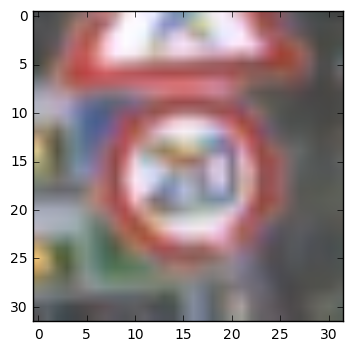

Class:  1


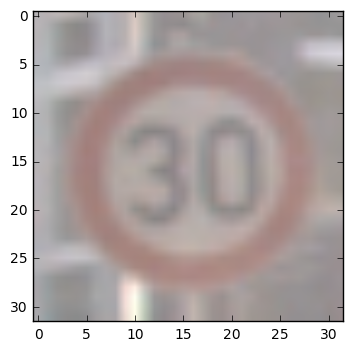

Class:  2


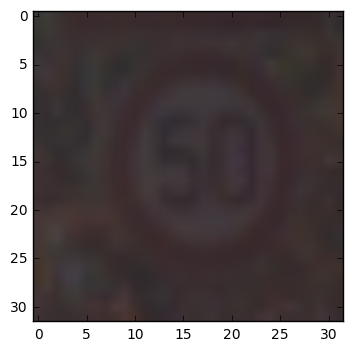

Class:  3


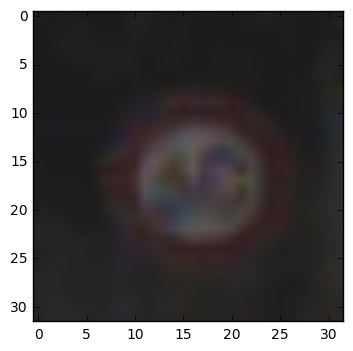

Class:  4


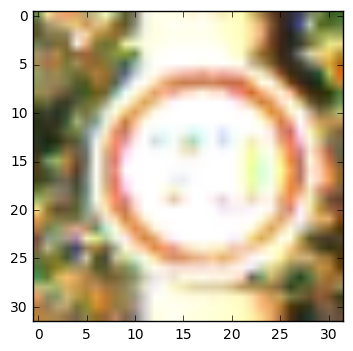

Class:  5


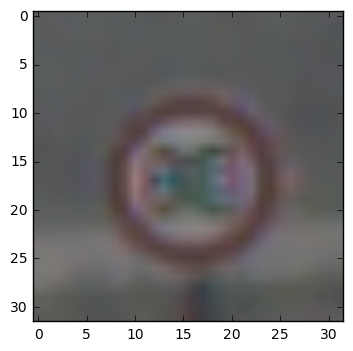

Class:  6


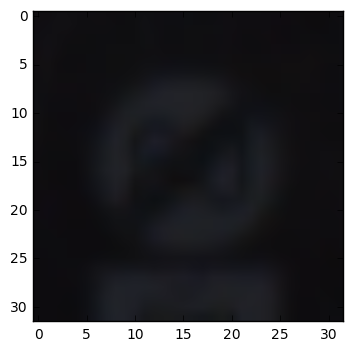

Class:  7


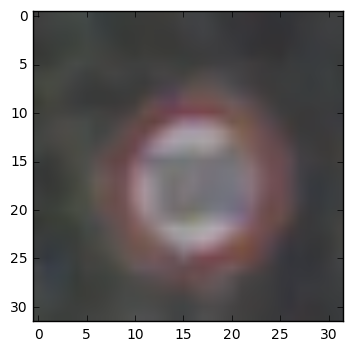

Class:  8


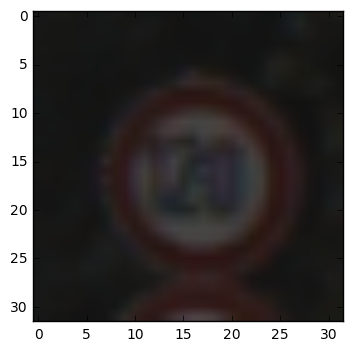

Class:  9


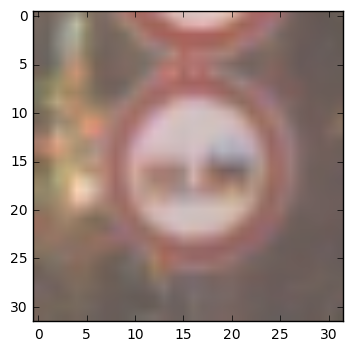

Class:  10


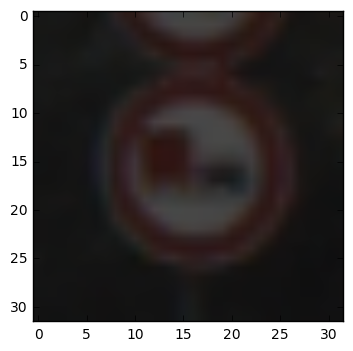

Class:  11


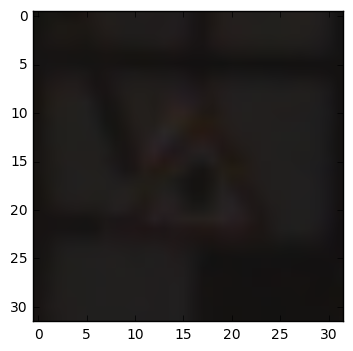

Class:  12


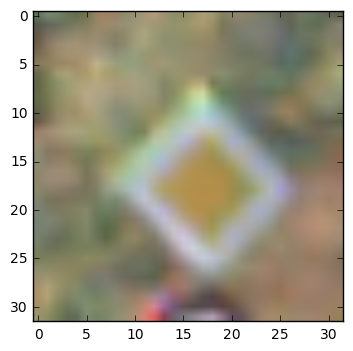

Class:  13


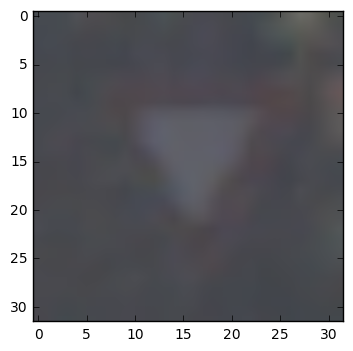

Class:  14


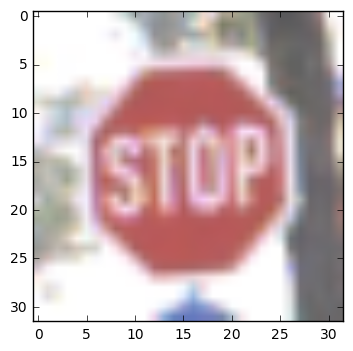

Class:  15


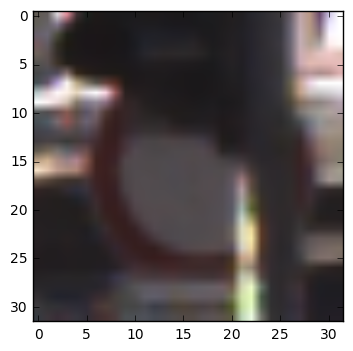

Class:  16


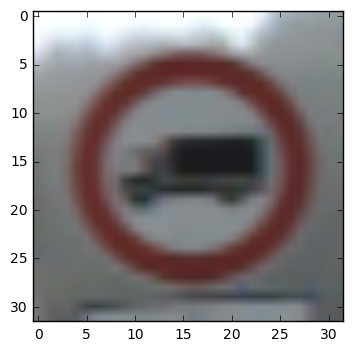

Class:  17


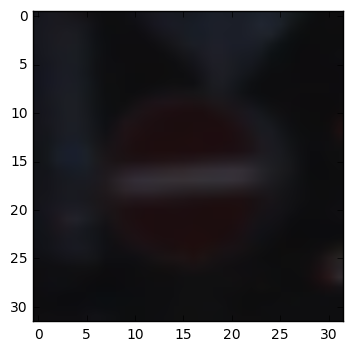

Class:  18


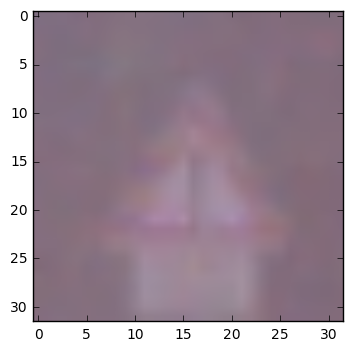

Class:  19


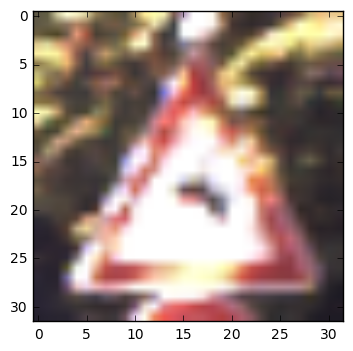

Class:  20


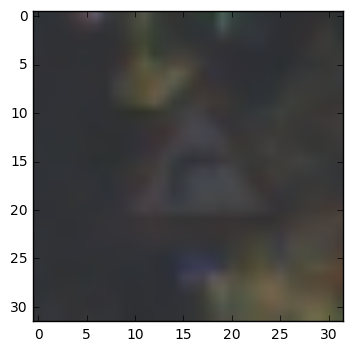

Class:  21


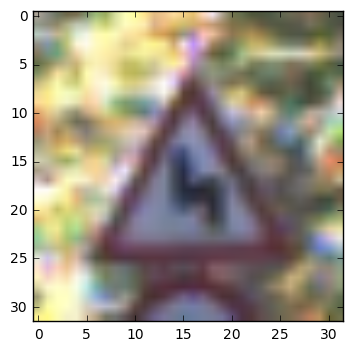

Class:  22


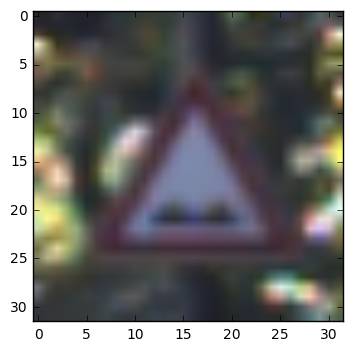

Class:  23


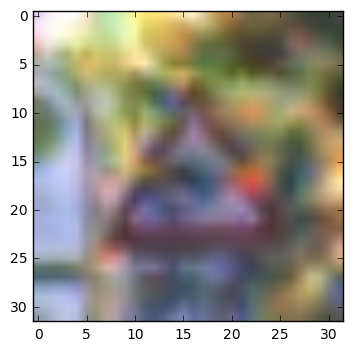

Class:  24


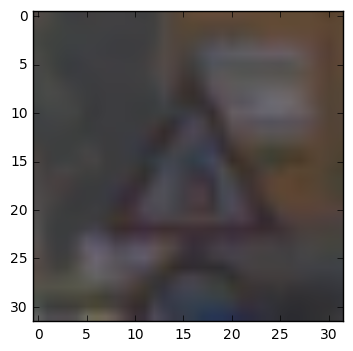

Class:  25


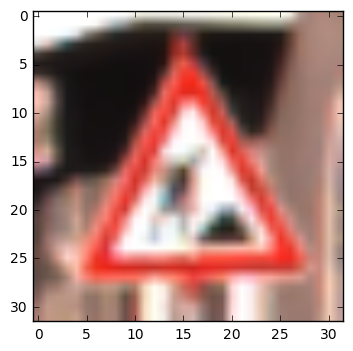

Class:  26


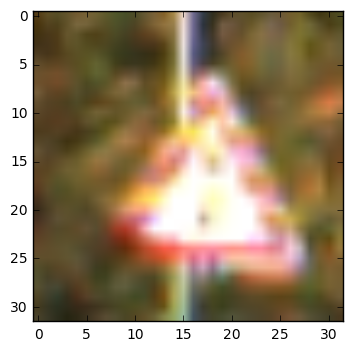

Class:  27


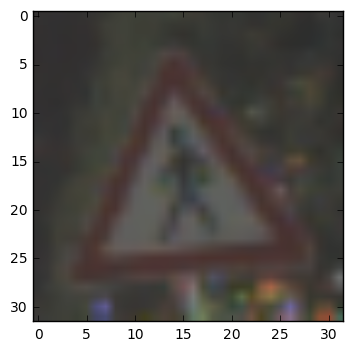

Class:  28


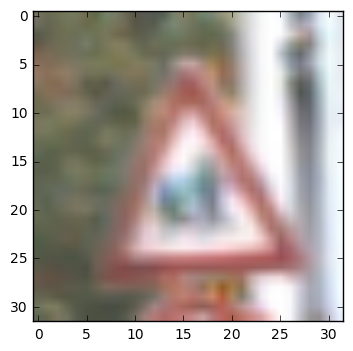

Class:  29


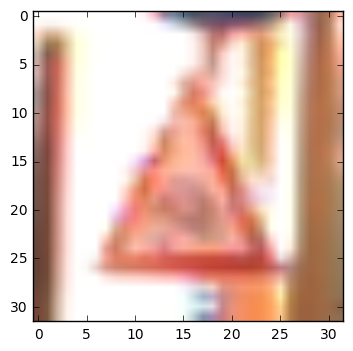

Class:  30


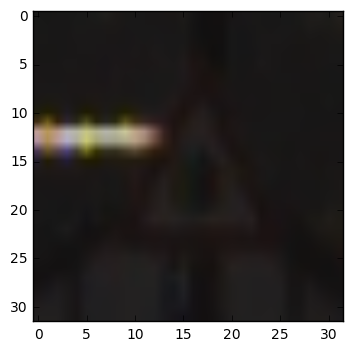

Class:  31


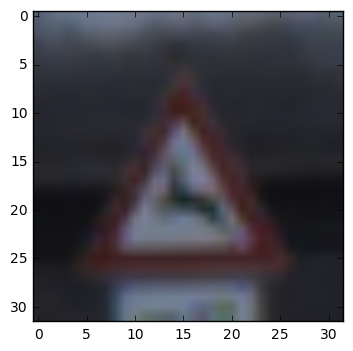

Class:  32


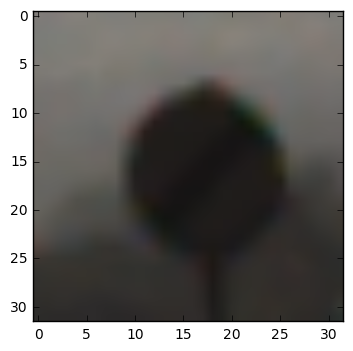

Class:  33


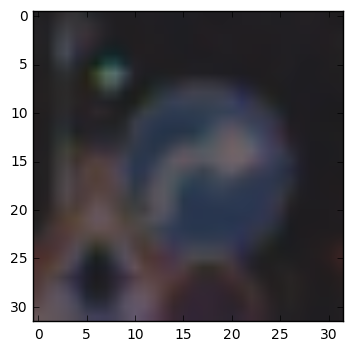

Class:  34


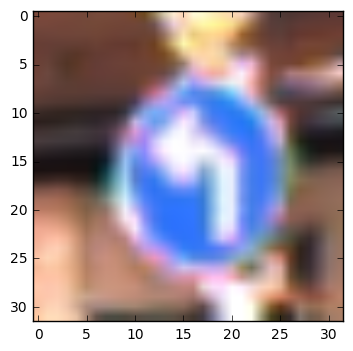

Class:  35


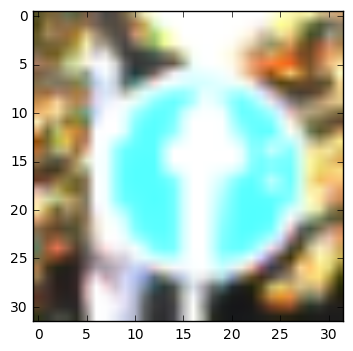

Class:  36


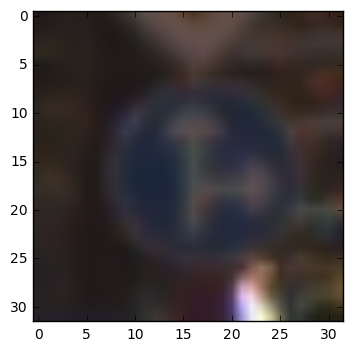

Class:  37


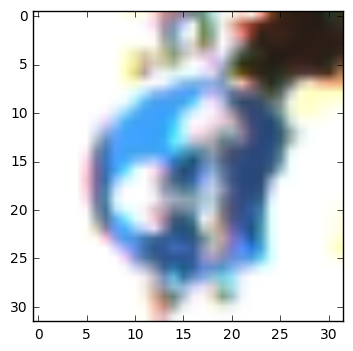

Class:  38


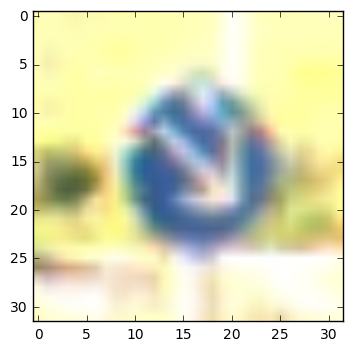

Class:  39


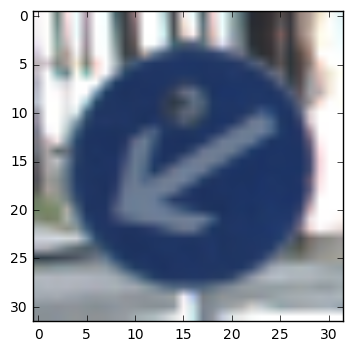

Class:  40


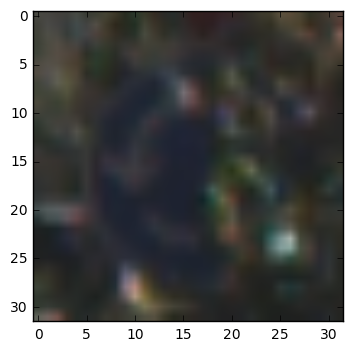

Class:  41


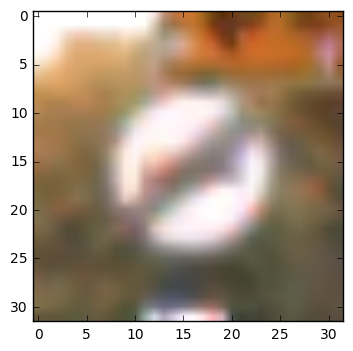

Class:  42


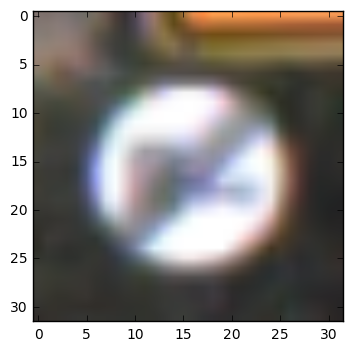

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def showImage(img, gray_scale=False):
    if gray_scale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()    

#show one image for each class
image_dict = {}
for i in range(X_train.shape[0]):
    class_val = y_train[i]
    #print('Class: ', y_train[i])
    if  class_val not in image_dict.keys():
        image_dict[class_val] = X_train[i]
    if len(image_dict.keys()) >= n_classes:
        break
    
for key in image_dict.keys():
    print('Class: ', key)
    showImage(image_dict[key])






Training dataset sample data count for each class:  OrderedDict([(0, 210), (1, 2220), (2, 2250), (3, 1410), (4, 1980), (5, 1860), (6, 420), (7, 1440), (8, 1410), (9, 1470), (10, 2010), (11, 1320), (12, 2100), (13, 2160), (14, 780), (15, 630), (16, 420), (17, 1110), (18, 1200), (19, 210), (20, 360), (21, 330), (22, 390), (23, 510), (24, 270), (25, 1500), (26, 600), (27, 240), (28, 540), (29, 270), (30, 450), (31, 780), (32, 240), (33, 689), (34, 420), (35, 1200), (36, 390), (37, 210), (38, 2070), (39, 300), (40, 360), (41, 240), (42, 240)]) 

Training dataset sample data count for each class:  OrderedDict([(0, 60), (1, 720), (2, 750), (3, 450), (4, 660), (5, 630), (6, 150), (7, 450), (8, 450), (9, 480), (10, 660), (11, 420), (12, 690), (13, 720), (14, 270), (15, 210), (16, 150), (17, 360), (18, 390), (19, 60), (20, 90), (21, 90), (22, 120), (23, 150), (24, 90), (25, 480), (26, 180), (27, 60), (28, 150), (29, 90), (30, 150), (31, 270), (32, 60), (33, 210), (34, 120), (35, 390), (36, 120)

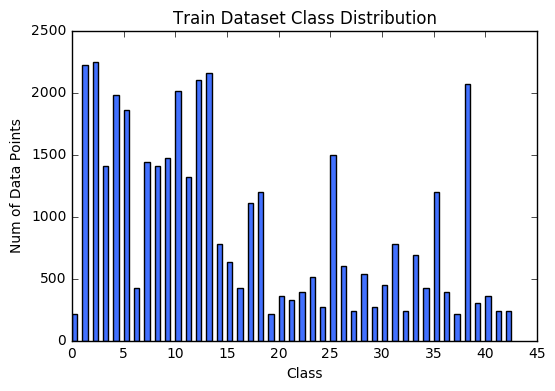

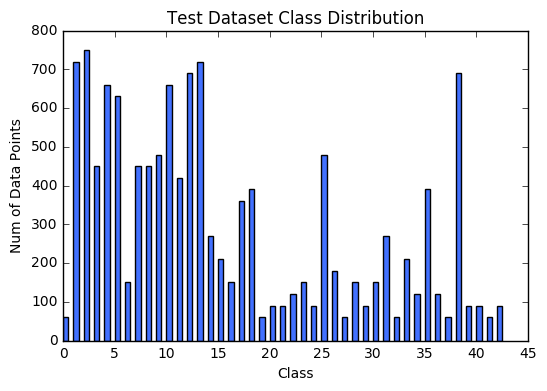

In [4]:
##Find number of examples in each class for both training and test set
from collections import Counter
from collections import OrderedDict
import operator

train_example_count_dict = Counter(y_train)
#train_example_sorted_tup = sorted(train_example_count_dict.items(), key=operator.itemgetter(0))
train_example_sorted_dict = OrderedDict(sorted(train_example_count_dict.items()))
print('Training dataset sample data count for each class: ', train_example_sorted_dict, '\n')
test_example_count_dict = Counter(y_test )
test_example_sorted_dict = OrderedDict(sorted(test_example_count_dict.items()))
print('Training dataset sample data count for each class: ', test_example_sorted_dict)

def plot_basic_barchart(dict):
    y = dict.values()
    x = dict.keys()
    width = 1/1.5
    plt.bar(x, y, width, color=(0.2588,0.4433,1.0))
    plt.show()

def plot_adanced_barchart(dict, title, ylabel, xlabel):
    
    fig, ax = plt.subplots()    
    y = dict.values()
    x = dict.keys()
    width = 0.5
    p1 = ax.bar(x, y, width, color=(0.2588,0.4433,1.0))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()    
#Draw bar chart to show train data pooints distribution    
plot_adanced_barchart(train_example_count_dict, 'Train Dataset Class Distribution', 'Num of Data Points', 'Class')
#Draw bar chart to show Test data pooints distribution   
plot_adanced_barchart(test_example_count_dict, 'Test Dataset Class Distribution', 'Num of Data Points', 'Class')
    



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Class:  0


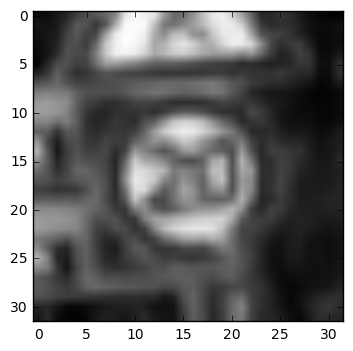

Class:  1


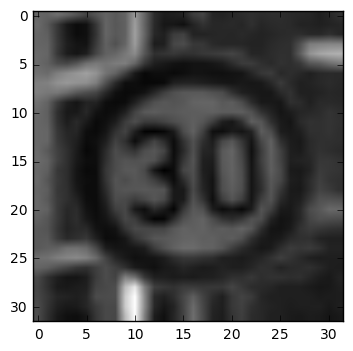

Class:  2


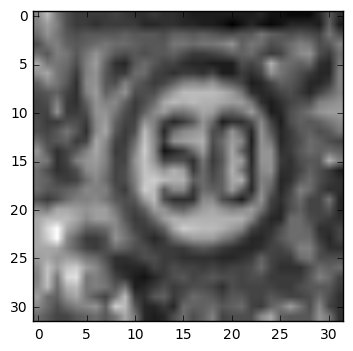

Class:  3


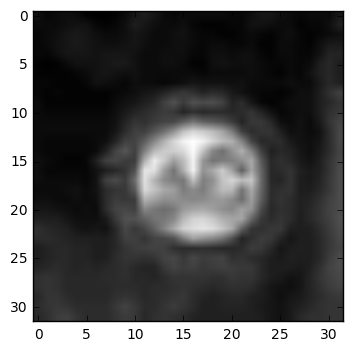

Class:  4


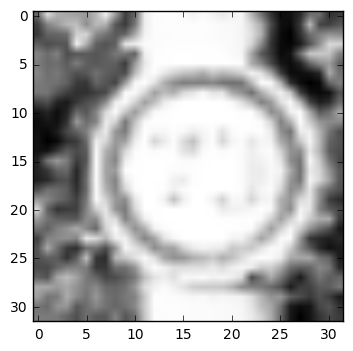

Class:  5


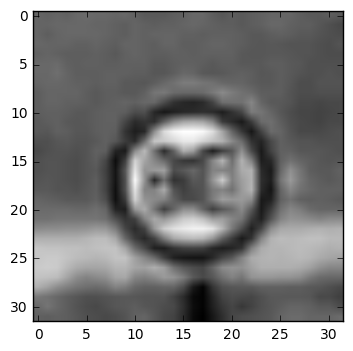

Class:  6


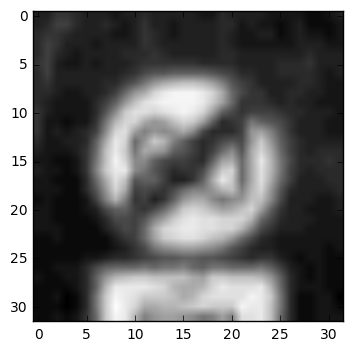

Class:  7


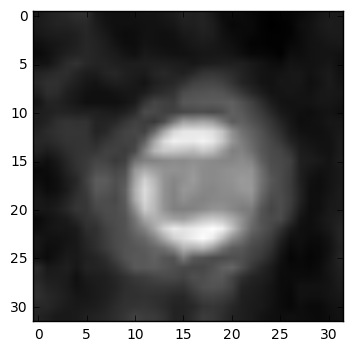

Class:  8


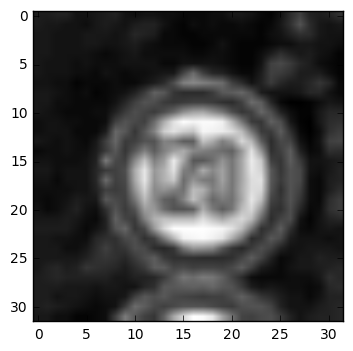

Class:  9


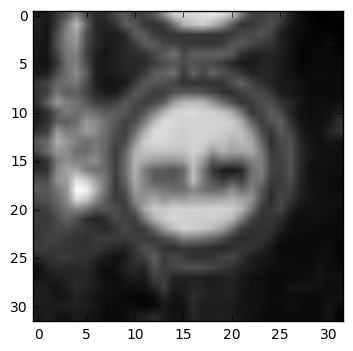

Class:  10


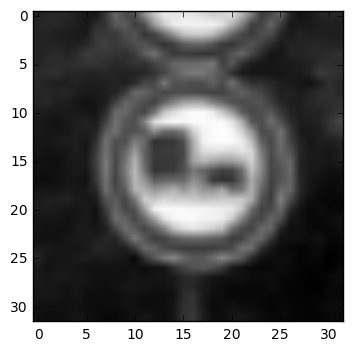

Class:  11


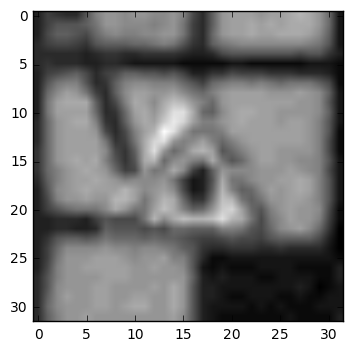

Class:  12


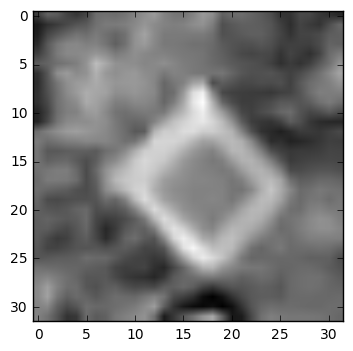

Class:  13


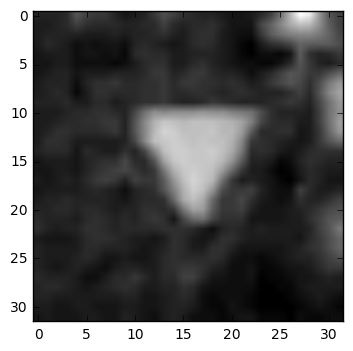

Class:  14


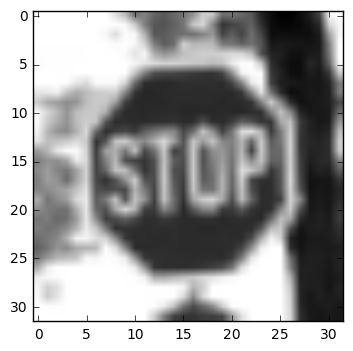

Class:  15


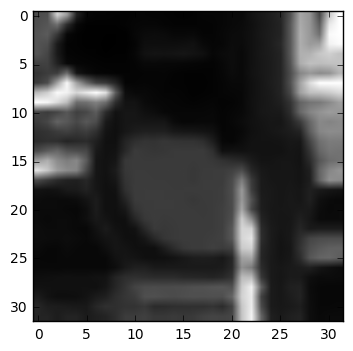

Class:  16


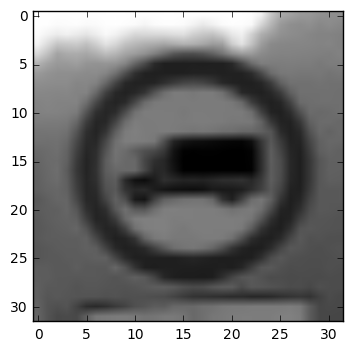

Class:  17


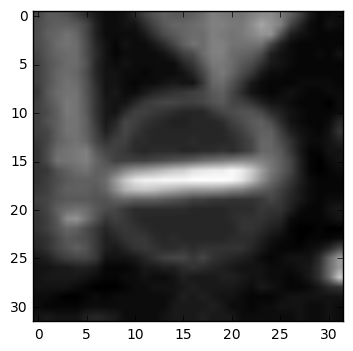

Class:  18


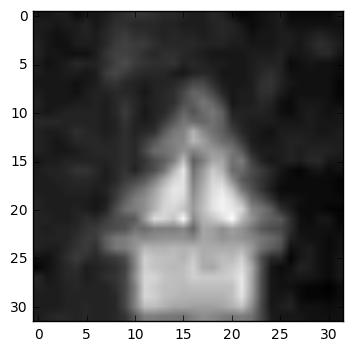

Class:  19


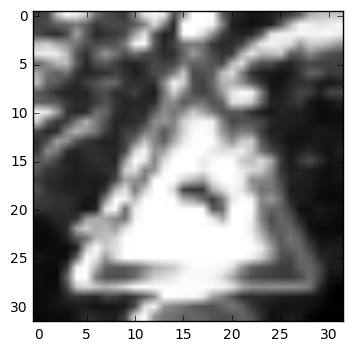

Class:  20


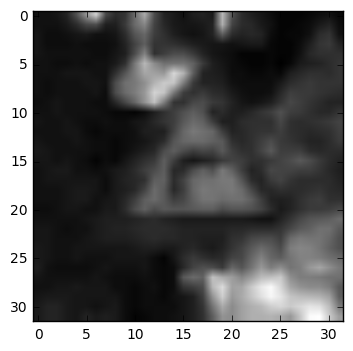

Class:  21


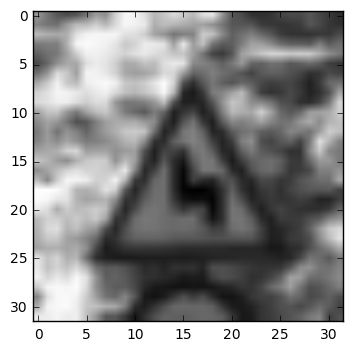

Class:  22


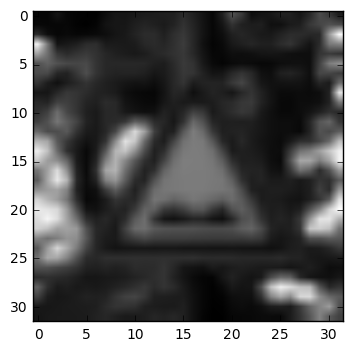

Class:  23


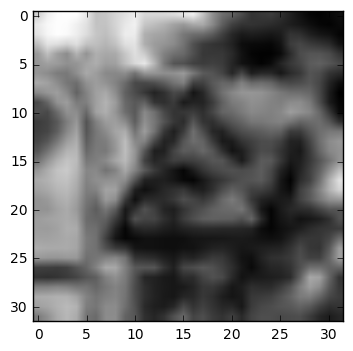

Class:  24


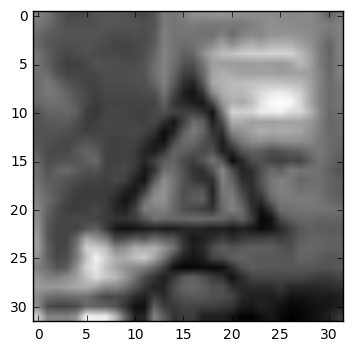

Class:  25


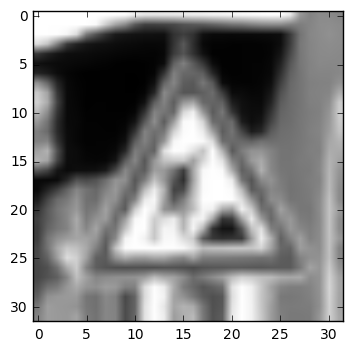

Class:  26


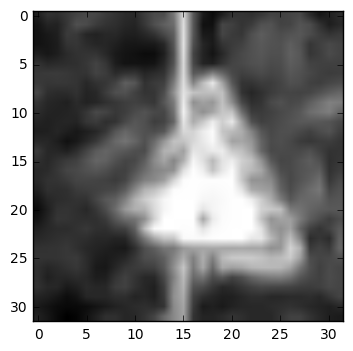

Class:  27


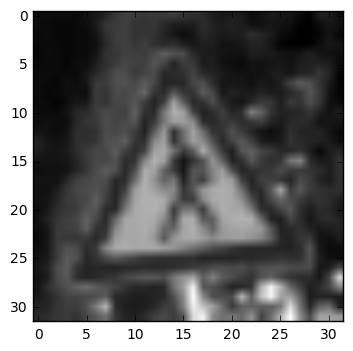

Class:  28


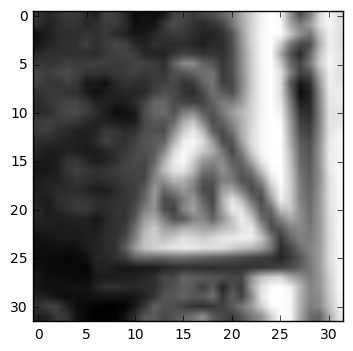

Class:  29


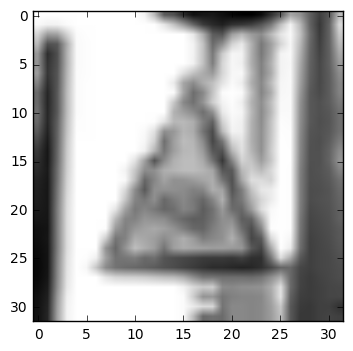

Class:  30


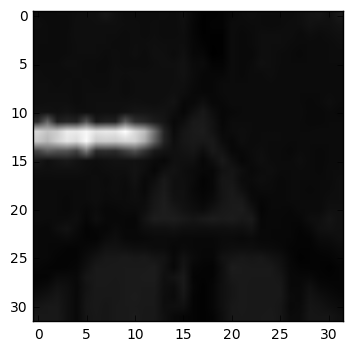

Class:  31


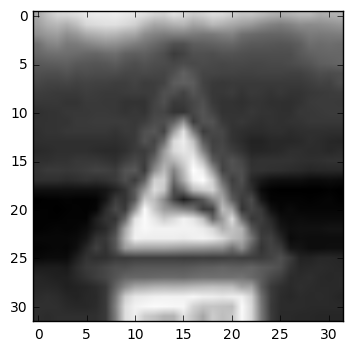

Class:  32


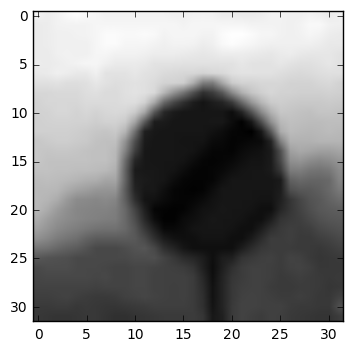

Class:  33


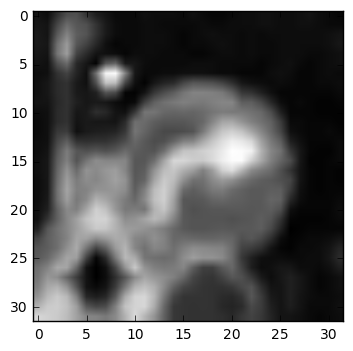

Class:  34


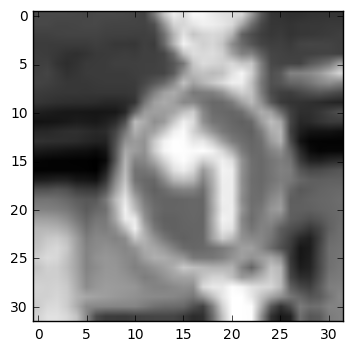

Class:  35


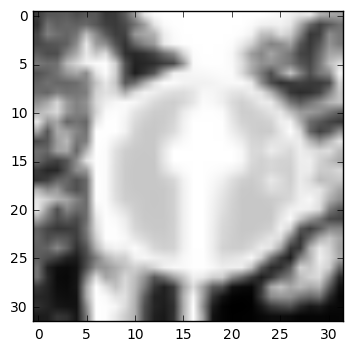

Class:  36


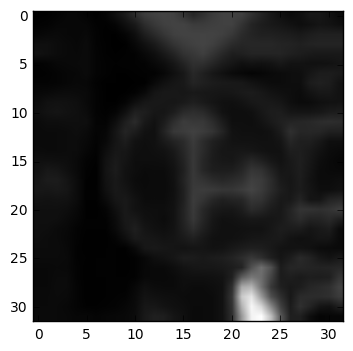

Class:  37


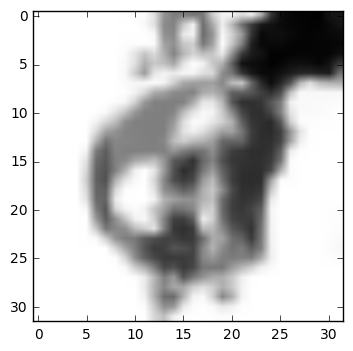

Class:  38


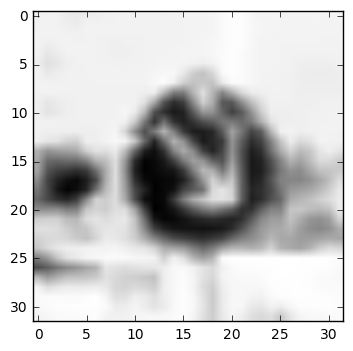

Class:  39


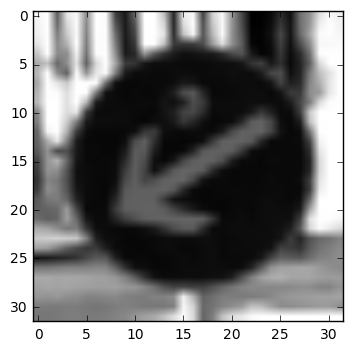

Class:  40


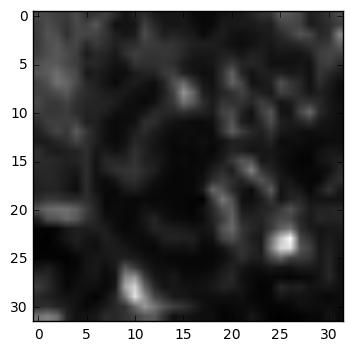

Class:  41


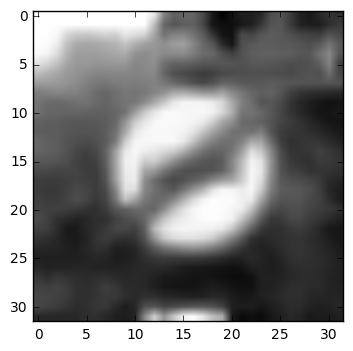

Class:  42


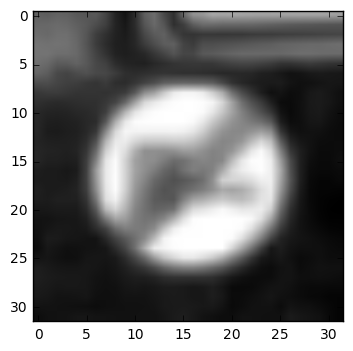

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def grayscale(img): 
    
    return cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2GRAY)

def to_grayscale(x):
    
    x_gray = np.zeros([x.shape[0],x.shape[1], x.shape[2]])
    for i in range(x.shape[0]):
        img = x[i]        
        img = grayscale(img)
        normalizedImg = np.zeros([x.shape[1], x.shape[2]])
        normalizedImg = cv2.normalize(img,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
        x_gray[i] = img    
 
    return x_gray

X_train_gray = to_grayscale(X_train)
X_test_gray = to_grayscale(X_test)



#show one image for each class in gray scale
image_dict = {}

for i in range(X_train_gray.shape[0]):
    class_val = y_train[i]
    #print('Class: ', y_train[i])
    if  class_val not in image_dict.keys():
        image_dict[class_val] = X_train_gray[i]
    if len(image_dict.keys()) >= n_classes:
        break

        
for key in image_dict.keys():
    print('Class: ', key)
    showImage(image_dict[key], True)



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

num_channels = 1 #for gray scale image

#Randomize dataset and labels
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

#Split dataset and labels to traning and validation dataset, labels using 
def split_data(X, y, t_size = 0.33):    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size= t_size, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test
#Define test, validation, test dataset and lables
X_train_gray, y_train = randomize(X_train_gray, y_train)
X_test_gray, y_test = randomize(X_test_gray, y_test)

train_dataset,  valid_dataset, train_labels, valid_labels = split_data(X_train_gray, y_train)
test_dataset = X_test_gray
test_labels = y_test
print('Train dataset shape: ', train_dataset.shape)
print('Valid dataset shape: ', valid_dataset.shape)
print('Test dataset shape: ', test_dataset.shape)
print('Train labels shape: ', train_labels.shape)
print('Valid labels shape: ', valid_labels.shape)
print('Test labels shape: ', test_labels.shape)

def reformat(dataset, labels):
# reform data set to 4D tensor, 2, 3 dimension is image size and 4th one is color channel for this case is 1  
    
    labels = labels.reshape(labels.shape[0])
   # dataset,  labels  = randomize(dataset, labels)
    dataset = dataset.reshape((-1, image_shape[0], image_shape[1], num_channels)).astype(np.float32)
    labels = (np.arange(n_classes) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

#train_dataset, train_labels = randomize(train_dataset, train_labels)
#valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)
#Test_dataset, test_labels = randomize(test_dataset, test_labels)

print('Reformed Train dataset shape: ', train_dataset.shape)
print('Reformed Valid dataset shape: ', valid_dataset.shape)
print('ReformedTest dataset shape: ', test_dataset.shape)
print('Reformed Train labels shape: ', train_labels.shape)
print('Reformed Valid labels shape: ', valid_labels.shape)
print('ReformedTest labels shape: ', test_labels.shape)




Train dataset shape:  (26270, 32, 32)
Valid dataset shape:  (12939, 32, 32)
Test dataset shape:  (12630, 32, 32)
Train labels shape:  (26270,)
Valid labels shape:  (12939,)
Test labels shape:  (12630,)
Reformed Train dataset shape:  (26270, 32, 32, 1)
Reformed Valid dataset shape:  (12939, 32, 32, 1)
ReformedTest dataset shape:  (12630, 32, 32, 1)
Reformed Train labels shape:  (26270, 43)
Reformed Valid labels shape:  (12939, 43)
ReformedTest labels shape:  (12630, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# Parameters
start_learning_rate = 1e-4 * 4
batch_size = 128
decay_steps = 1000
decay_size = 0.95
image_size = train_dataset.shape[1]
num_channels = 1




graph = tf.Graph()
with graph.as_default():
    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,None))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
    
    
    
    layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
    }

    # Store layers weight & bias
    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
        'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
        'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
        'fully_connected': tf.Variable(tf.truncated_normal(
        [4*4*128, layer_width['fully_connected']])),
        'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
        
    }
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
        'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
        'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
        'out': tf.Variable(tf.zeros(n_classes))
    }
    #Drop out ratio
    keep_prob = tf.placeholder(tf.float32) 

    
    def conv2d(x, W, b, strides=1):
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
        x = tf.nn.bias_add(x, b)
        return tf.nn.relu(x)


    def maxpool2d(x, k=2):
        return tf.nn.max_pool(
            x,
            ksize=[1, k, k, 1],
            strides=[1, k, k, 1],
            padding='SAME')

    # Create model
    def cnn(x, is_training = True):        
        
        # Layer 1 - 32*32*1 to 16*16*32
        conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])        
        conv1 = maxpool2d(conv1)
        #print('shape of conv1: ', tf.shape(conv1))

        # Layer 2 - 16*16*32 to 8*8*64
        conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
        conv2 = maxpool2d(conv2)

        # Layer 3 - 8*8*64 to 4*4*128
        conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
        conv3 = maxpool2d(conv3)
        
        #print('shape of conv3: ', tf.shape(conv3))

        # Fully connected layer - 4*4*128 to 512
        # Reshape conv3 output to fit fully connected layer input
        fc1 = tf.reshape(
            conv3,
            [-1, weights['fully_connected'].get_shape().as_list()[0]])
        fc1 = tf.add(
            tf.matmul(fc1, weights['fully_connected']),
            biases['fully_connected'])
        fc1 = tf.nn.relu(fc1)
        #use dropout
        #if is_training:
            #fc1 = tf.nn.dropout(fc1, keep_prob)
        # Output Layer - class prediction - 512 to 43
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        return out
    
    logits = cnn(tf_train_dataset)
    #Calculate loss   
    loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
    # Optimizer. Learning reate decay
    global_step = tf.Variable(0)  # count the number of steps taken.
    #caculate decayed learning rate  
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, decay_steps, decay_size )
    #Optime loss
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(  cnn(tf_valid_dataset, False ))
    test_prediction = tf.nn.softmax(cnn(tf_test_dataset, False))




### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

num_steps = 20000
with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]       
    
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob:0.5}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))


Initialized
Minibatch loss at step 0: 220223744.000000
Minibatch accuracy: 3.1%
Validation accuracy: 3.6%


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.